### Importing libraries 

## The 6th Project for Data Analyst Nano Degree (Communicating Data Findings)

#### My dataset for this project is From Kaggla  (https://www.kaggle.com/datasnaek/youtube-new)
#### This dataset meets the requirements as illustrated bellow

#### Context
YouTube (the world-famous video sharing website) maintains a list of the top trending videos on the platform. According to Variety magazine, “To determine the year’s top-trending videos, YouTube uses a combination of factors including measuring users interactions (number of views, shares, comments and likes). Note that they’re not the most-viewed videos overall for the calendar year”. Top performers on the YouTube trending list are music videos (such as the famously virile “Gangam Style”), celebrity and/or reality TV performances, and the random dude-with-a-camera viral videos that YouTube is well-known for.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pylab import rcParams
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

##### Importing the US csv After saving it locally 


In [2]:
df = pd.read_csv('USvideos.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

Check for data to meets the outsource data selection

## Dataset columns 
- video_id (object)
- trending_date (object)
- title (object)
- channel_title (object)
- category_id (int64)
- publish_time (object) (needs to be modified to timestamp)
- tags (int64)
- views (int64)
- likes (int64)
- dislikes (int64)
- comment_count (int64)
- thumbnail_link (object)
- comments_disabled (bool)
- ratings_disabled (bool)
- video_error_or_removed (bool)
- description (object)

Data requirements check:
- Include at least 600 observations (OK.)
- Include at least eight variables (OK.)
- Include at least one qualitative / categorical variable. (This can also be engineered / created.) (OK.)
- Include at least one numeric variable. (OK.)
- Tidiness (OK.)

## Data Cleaning 

In [11]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

#### Dropping the columns that are not necessary for the analysis 

In [28]:
df = df.drop(columns=['thumbnail_link', 'description', 'video_error_or_removed'])

In [29]:
#test
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   video_id           40949 non-null  object
 1   trending_date      40949 non-null  object
 2   title              40949 non-null  object
 3   channel_title      40949 non-null  object
 4   category_id        40949 non-null  int64 
 5   publish_time       40949 non-null  object
 6   tags               40949 non-null  object
 7   views              40949 non-null  int64 
 8   likes              40949 non-null  int64 
 9   dislikes           40949 non-null  int64 
 10  comment_count      40949 non-null  int64 
 11  comments_disabled  40949 non-null  bool  
 12  ratings_disabled   40949 non-null  bool  
dtypes: bool(2), int64(5), object(6)
memory usage: 3.5+ MB


In [10]:
### Checking for null values 
df.isnull().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64

##### Modifying the category_id turning numbers into category_name for each number according to this resource:
https://gist.github.com/dgp/1b24bf2961521bd75d6c

In [4]:
# Extracing the unique values
unique_values =  pd.unique(df['category_id'])
print(unique_values)

[22 24 23 28  1 25 17 10 15 27 26  2 19 20 29 43]


In [5]:
df['category_name'] = np.nan

df.loc[(df["category_id"] == 1),"category_name"] = 'Film and Animation'
df.loc[(df["category_id"] == 2),"category_name"] = 'Cars and Vehicles'
df.loc[(df["category_id"] == 10),"category_name"] = 'Music'
df.loc[(df["category_id"] == 15),"category_name"] = 'Pets and Animals'
df.loc[(df["category_id"] == 17),"category_name"] = 'Sport'
df.loc[(df["category_id"] == 19),"category_name"] = 'Travel and Events'
df.loc[(df["category_id"] == 20),"category_name"] = 'Gaming'
df.loc[(df["category_id"] == 22),"category_name"] = 'People and Blogs'
df.loc[(df["category_id"] == 23),"category_name"] = 'Comedy'
df.loc[(df["category_id"] == 24),"category_name"] = 'Entertainment'
df.loc[(df["category_id"] == 25),"category_name"] = 'News and Politics'
df.loc[(df["category_id"] == 26),"category_name"] = 'How to and Style'
df.loc[(df["category_id"] == 27),"category_name"] = 'Education'
df.loc[(df["category_id"] == 28),"category_name"] = 'Science and Technology'
df.loc[(df["category_id"] == 29),"category_name"] = 'Non Profits and Activism'
df.loc[(df["category_id"] == 25),"category_name"] = 'News & Politics'

In [6]:
#test for new category_name column
print(df.category_name.value_counts())

Entertainment               9964
Music                       6472
How to and Style            4146
Comedy                      3457
People and Blogs            3210
News & Politics             2487
Science and Technology      2401
Film and Animation          2345
Sport                       2174
Education                   1656
Pets and Animals             920
Gaming                       817
Travel and Events            402
Cars and Vehicles            384
Non Profits and Activism      57
Name: category_name, dtype: int64


## Exploratory Visualization 
### Exploring the numareic variables

In [7]:
#Exploring the relation between the numeric variables  
df.corr(method='pearson')

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
category_id,1.000000,-0.168231,-0.173921,-0.033547,-0.076307,0.048949,-0.013506,-0.030011
views,-0.168231,1.000000,0.849177,0.472213,0.617621,0.002677,0.015355,-0.002256
likes,-0.173921,0.849177,1.000000,0.447186,0.803057,-0.028918,-0.020888,-0.002641
dislikes,-0.033547,0.472213,0.447186,1.000000,0.700184,-0.004431,-0.008230,-0.001853
comment_count,-0.076307,0.617621,0.803057,0.700184,1.000000,-0.028277,-0.013819,-0.003725
comments_disabled,0.048949,0.002677,-0.028918,-0.004431,-0.028277,1.000000,0.319230,-0.002970
ratings_disabled,-0.013506,0.015355,-0.020888,-0.008230,-0.013819,0.319230,1.000000,-0.001526
video_error_or_removed,-0.030011,-0.002256,-0.002641,-0.001853,-0.003725,-0.002970,-0.001526,1.000000


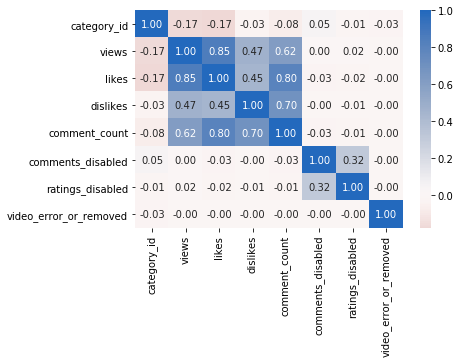

In [8]:
sb.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)

### Observations: 
#### Strong relations (Positve):
- likes & veiws 
- dislikes & veiws 
- views & comment_count 
- likes & comment_count

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

### Scatter plots for corelation between observed variables above: 

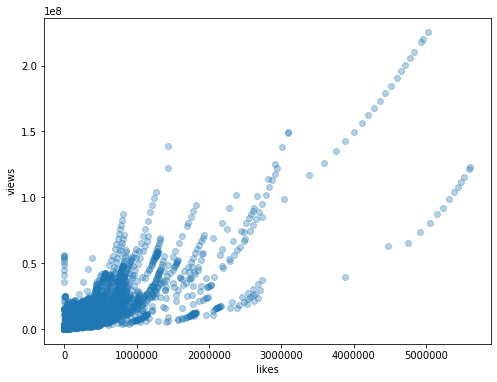

In [30]:
# positive relation between likes and veiws
plt.figure(figsize = (8,6))
sb.regplot(data = df, x = 'likes', y = 'views', fit_reg = False, scatter_kws = {'alpha' : 1/3})

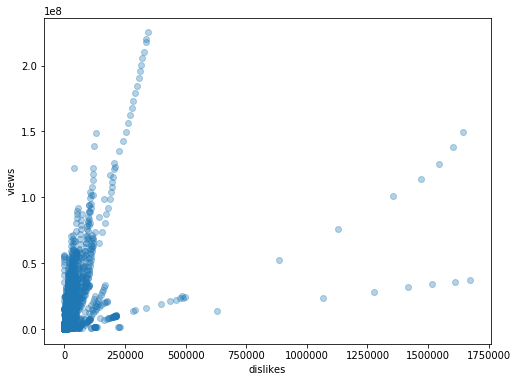

In [29]:
# positive relation between dislike and veiws
plt.figure(figsize = (8,6))
sb.regplot(data = df, x = 'dislikes', y = 'views', fit_reg = False, scatter_kws = {'alpha' : 1/3})

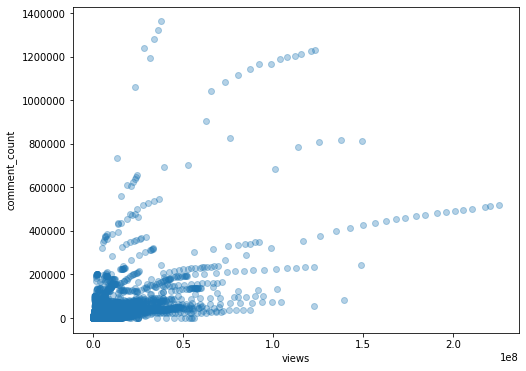

In [35]:
#Positive corelation between views and comment count
plt.figure(figsize = (8,6))
sb.regplot(data = df, x = 'views', y = 'comment_count', fit_reg = False, scatter_kws = {'alpha' : 1/3})

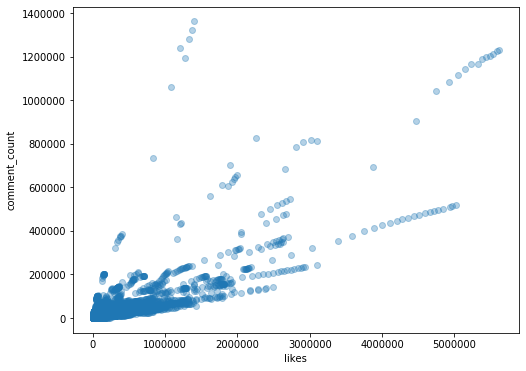

In [36]:
#Positive corelation between likes and comment count
plt.figure(figsize = (8,6))
sb.regplot(data = df, x = 'likes', y = 'comment_count', fit_reg = False, scatter_kws = {'alpha' : 1/3})

### Exploring the categorical variables

#### Number of Video in each Category 

Text(0, 0.5, 'Count')

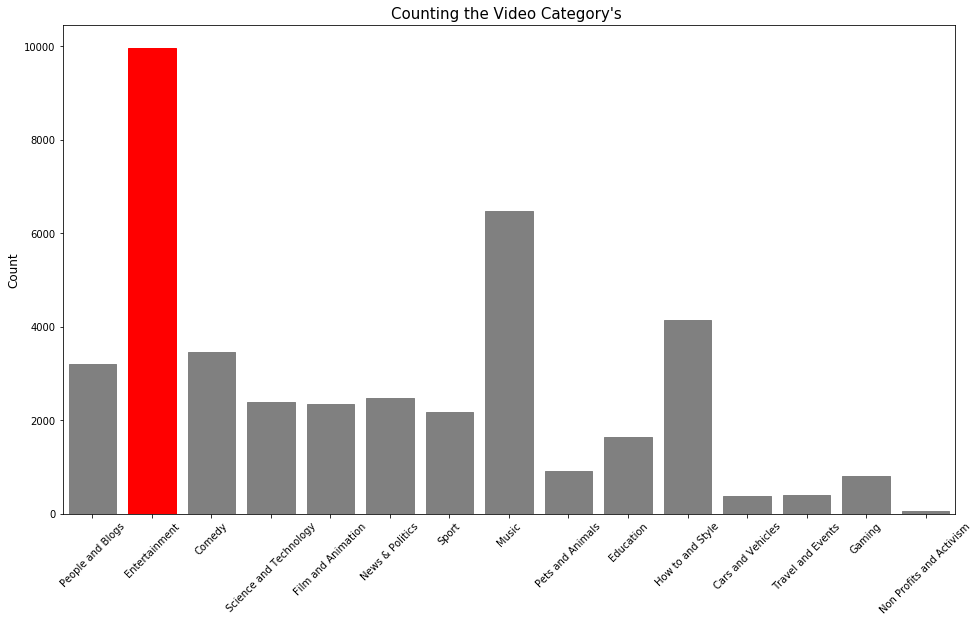

In [39]:
plt.figure(figsize = (16,9))
ax = sb.countplot(x="category_name", data=df,  orient ='H')
for bar in ax.patches:
    if bar.get_height() > 8000:
        bar.set_color('red')    
    else:
        bar.set_color('grey')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title("Counting the Video Category's ", fontsize=15)
ax.set_xlabel('', fontsize=12)
ax.set_ylabel("Count", fontsize=12)

#### Views count per years

In [45]:
best_count = df[['channel_title', 'views', 'publish_time']]
best_count = best_count.sort_values('views', ascending = False)
best_count['publish_time'] = pd.DatetimeIndex(df['publish_time']).year
best_count

,channel_title,views,publish_time
38547,ChildishGambinoVEVO,225211923,2017
38345,ChildishGambinoVEVO,220490543,2017
38146,ChildishGambinoVEVO,217750076,2017
37935,ChildishGambinoVEVO,210338856,2017
37730,ChildishGambinoVEVO,205643016,2017
...,...,...,...
546,GoDucksdotcom,687,2018
14531,Palo Alto Online,658,2018
14782,Newsy,559,2018
14563,Newsy,554,2018


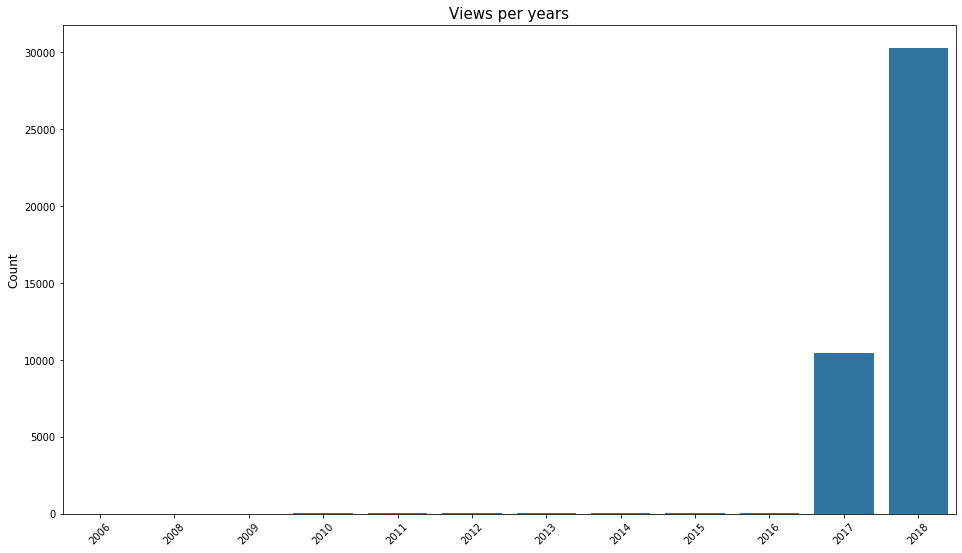

In [49]:
base_color = sb.color_palette()[0]
plt.figure(figsize = (16,9))
ax = sb.countplot(x="publish_time", data=best_count, color = base_color)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title("Views per years", fontsize=15)
ax.set_xlabel('', fontsize=12)
ax.set_ylabel("Count", fontsize=12);

## likes count per years

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


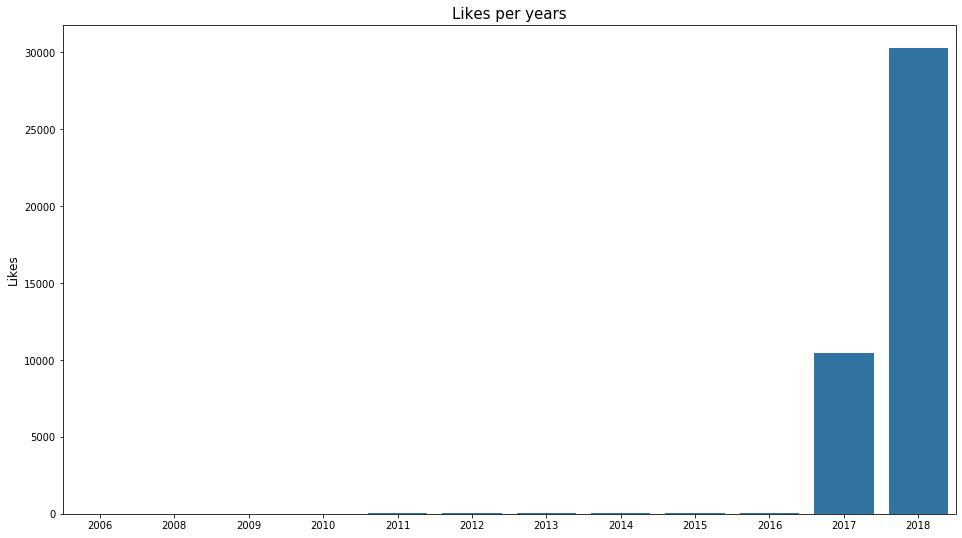

In [50]:
base_color = sb.color_palette()[0]
like= df[['likes', 'publish_time']]
plt.figure(figsize = (16,9))
like['publish_time'] = pd.DatetimeIndex(like['publish_time']).year
ax = sb.countplot(x="publish_time", data=like, color = base_color)
ax.set_title("Likes per years", fontsize=15)
ax.set_xlabel('', fontsize=12)
ax.set_ylabel("Likes", fontsize=12);

#### Word Cloud To track the trend in channels

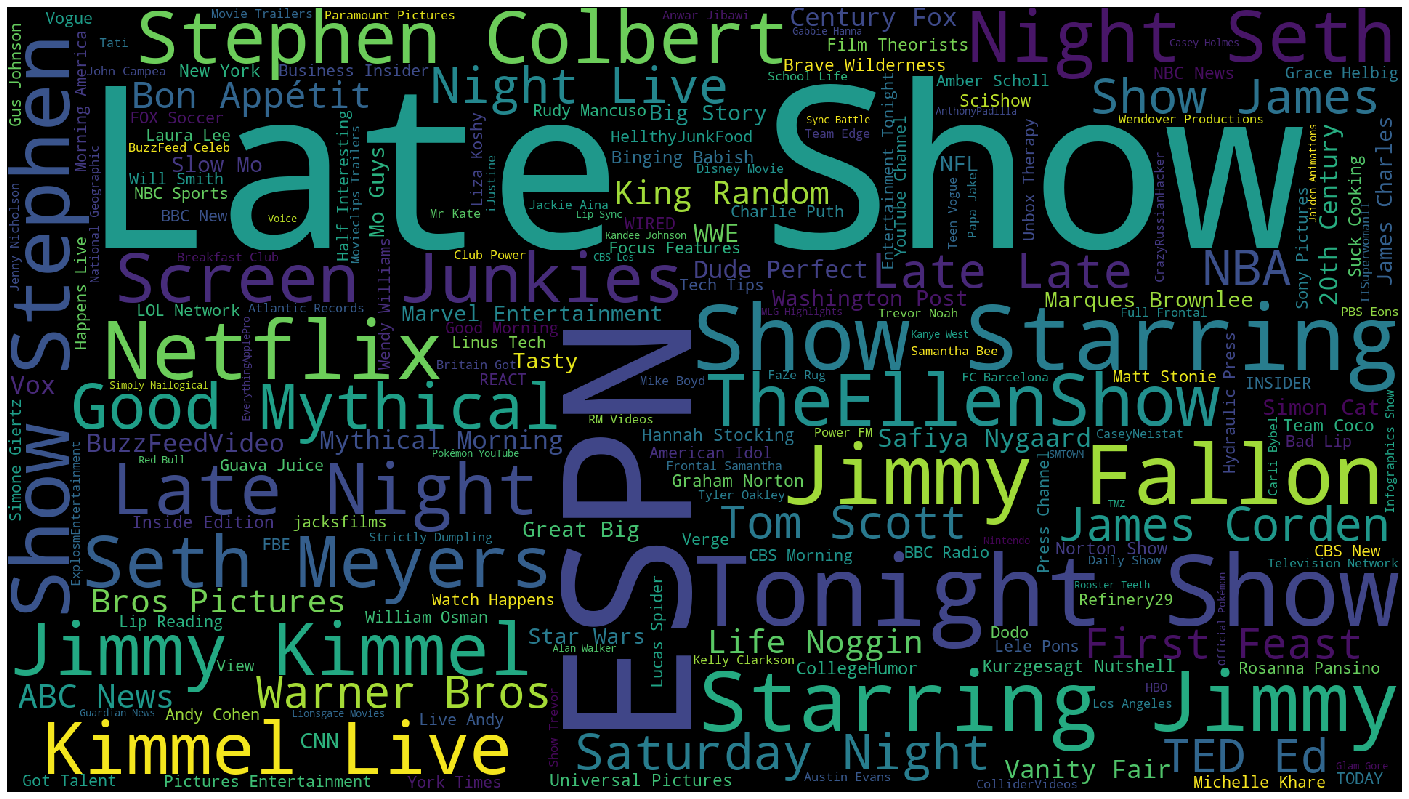

In [17]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.channel_title))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('category.png')
plt.show()

## Best 12 Channels view comparison 

In [51]:
Best_twl = df[['channel_title', 'views']]
Best_twl = Best_twl.groupby('channel_title')['views'].sum()
Best_twl = pd.DataFrame(Best_twl)
Best_twl = Best_twl.sort_values('views', ascending=False)
Best_twl = Best_twl[:12]
Best_twl= Best_twl.reset_index()
Best_twl.head()


,channel_title,views
0,ChildishGambinoVEVO,3758488765
1,ibighit,2235906679
2,Dude Perfect,1870085178
3,Marvel Entertainment,1808998971
4,ArianaGrandeVevo,1576959172


Text(0, 0.5, 'Views Counts')

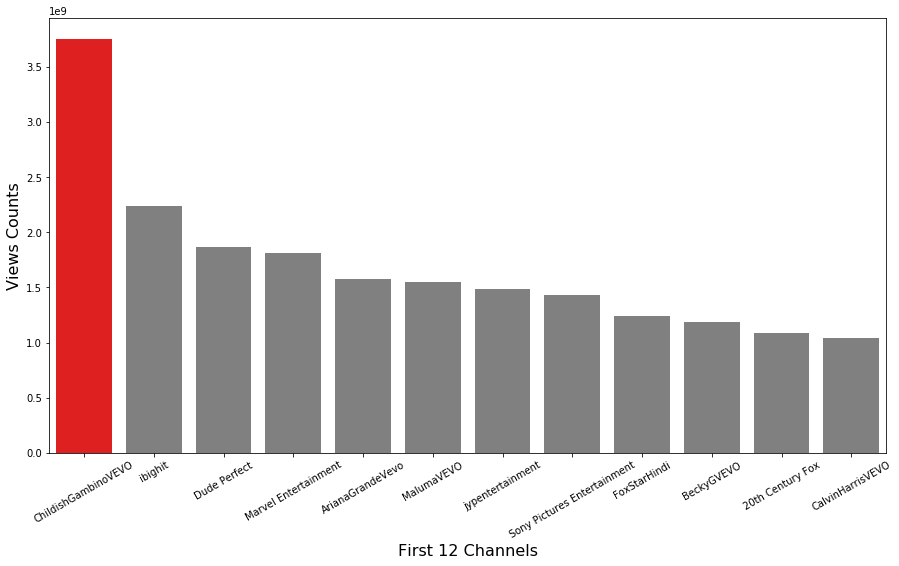

In [52]:
plt.figure(figsize=(15, 8))
c = ['red', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey']
ax = sb.barplot(data = Best_twl, x = 'channel_title', y ='views', palette =c)
ax.set_xticklabels(labels= Best_twl.channel_title, fontsize=10, rotation=30)
ax.set_xlabel(xlabel='First 12 Channels', fontsize=16)
ax.set_ylabel(ylabel='Views Counts', fontsize=16)

## Added videos in every year

In [54]:
year = df[['publish_time','video_id']]
year['publish_time'] = pd.DatetimeIndex(year['publish_time']).year
year = year.groupby('publish_time')['video_id'].count()
year = pd.DataFrame(year)
year = year.sort_values('publish_time', ascending=False)
year= year.reset_index()
year.head(11)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,publish_time,video_id
0,2018,30279
1,2017,10428
2,2016,35
3,2015,35
4,2014,32
5,2013,44
6,2012,24
7,2011,27
8,2010,19
9,2009,14


# Conclusion Summary
- The most desireable category for US Youtube users is entertainment.
- According to dataset the highest two years for veiws and likes are 2017, 2018.
- The most common words for channels names in US are
    - Late show 
    - ESPN
    - Show Starting 
    - Netflix 
    - Stephen Colbert
    - Starring Jimmy 
- The Highest channel in veiws is (ChildishGambinoVEVO)

### Correlation between variables:
- likes & veiws 
- dislikes & veiws 
- views & comment_count 
- likes & comment_coun